## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [2]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['5k_PEG', 'PS_COOH', '5k_PEG_NH2', 'PS_NH2']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [2]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                #os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_5k_PEG_2mM_XY01.csv
features_5k_PEG_2mM_XY02.csv
features_5k_PEG_2mM_XY03.csv
features_5k_PEG_2mM_XY04.csv
features_5k_PEG_2mM_XY05.csv
features_5k_PEG_2mM_XY06.csv
features_5k_PEG_2mM_XY07.csv
features_5k_PEG_2mM_XY08.csv
features_5k_PEG_2mM_XY09.csv
features_5k_PEG_2mM_XY10.csv
features_PS_COOH_2mM_XY01.csv
features_PS_COOH_2mM_XY02.csv
features_PS_COOH_2mM_XY03.csv
features_PS_COOH_2mM_XY04.csv
features_PS_COOH_2mM_XY05.csv
features_PS_COOH_2mM_XY06.csv
features_PS_COOH_2mM_XY07.csv
features_PS_COOH_2mM_XY08.csv
skip filename: features_PS_COOH_2mM_XY09.csv
features_PS_COOH_2mM_XY10.csv
features_5k_PEG_NH2_2mM_XY01.csv
features_5k_PEG_NH2_2mM_XY02.csv
features_5k_PEG_NH2_2mM_XY03.csv
features_5k_PEG_NH2_2mM_XY04.csv
features_5k_PEG_NH2_2mM_XY05.csv
features_5k_PEG_NH2_2mM_XY06.csv
features_5k_PEG_NH2_2mM_XY07.csv
features_5k_PEG_NH2_2mM_XY08.csv
features_5k_PEG_NH2_2mM_XY09.csv
features_5k_PEG_NH2_2mM_XY10.csv
features_PS_NH2_2mM_XY01.csv
features_PS_NH2_2mM_XY02.csv
feature

In [8]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [9]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [10]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].reset_index()
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].reset_index()

In [13]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-4.05474474 -0.94653888 -0.52032728]


In [11]:
types = mws

In [14]:
types = ['PS_NH2', '5k_PEG_NH2', '5k_PEG', 'PS_COOH']

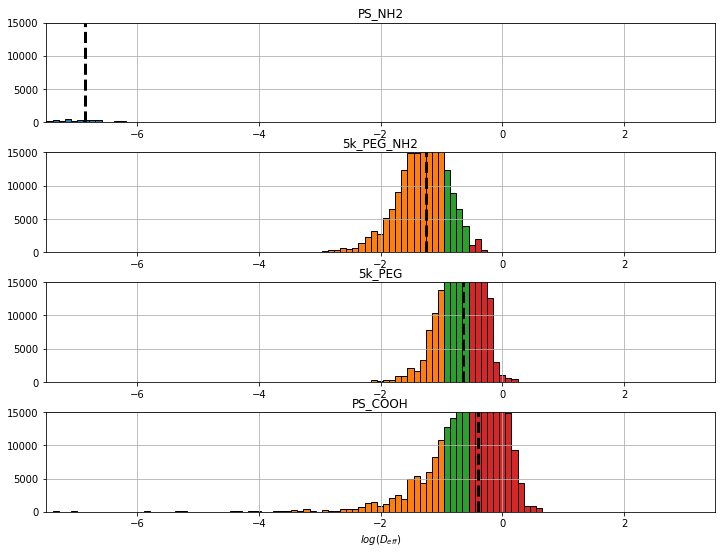

In [15]:
import matplotlib.pyplot as plt
Dbins = [-10, -4.055, -0.947, -0.520, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Particle Type']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

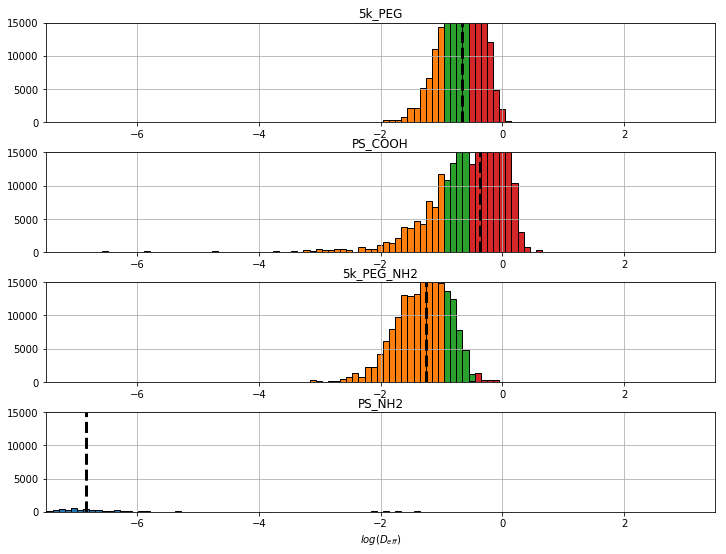

In [21]:
Dbins = [-10, -4.055, -0.947, -0.520, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
types = mws
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, -4.055, -0.947, -0.520, 10], labels=types).astype(str))
y_true2 = X_train['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

     5k_PEG     0.5155    0.4719    0.4927    246757
 5k_PEG_NH2     0.6098    0.8114    0.6963    189917
    PS_COOH     0.7064    0.6204    0.6606    352129
     PS_NH2     0.8352    0.8306    0.8329      5761
        nan     0.0000    0.0000    0.0000         0

avg / total     0.6250    0.6214    0.6182    794564



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [20]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, -4.055, -0.947, -0.520, 10], labels=types).astype(str))
y_true2 = X_test['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

     5k_PEG     0.5162    0.4894    0.5024    249710
 5k_PEG_NH2     0.5946    0.7784    0.6742    191174
    PS_COOH     0.7245    0.6276    0.6726    352051
     PS_NH2     0.8027    0.7837    0.7931      6010
        nan     0.0000    0.0000    0.0000         0

avg / total     0.6289    0.6217    0.6207    798945



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
fstats_new.to_csv('features.csv')

In [4]:
fstats_tot.shape

(1593619, 71)

In [5]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

(496469, 71)
(704180, 71)
(381189, 71)
(11781, 71)


In [6]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(mws)].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [7]:
ncomp = 14
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.2178836499901808
1 component: 0.3516180888938438
2 component: 0.444135604576138
3 component: 0.5058147889577757
4 component: 0.5526663633353289
5 component: 0.5973213243324499
6 component: 0.6346981579611551
7 component: 0.6690413717061952
8 component: 0.6978405205358029
9 component: 0.7252911379050878
10 component: 0.7476465615268
11 component: 0.767932775184797
12 component: 0.7869536275757788
13 component: 0.8046969015466531


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

In [ ]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [ ]:
fstats_num.columns

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [ ]:
import numpy as np
#ncomp = 10
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG_NH2'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_NH2'].values[:, -ncomp:], axis=0)

In [ ]:
dicti[3]

In [ ]:
labels = mws
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 9, 14))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

In [ ]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

In [ ]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 1, 2])

## Neural Network

In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
featofvar = 'Particle Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')

## Alternate Binning

In [50]:
bins = list(range(0, 2048+1, 256))
bins

[0, 256, 512, 768, 1024, 1280, 1536, 1792, 2048]

In [69]:
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pca.final.bins = pcadataset.final.bins.astype(int)

In [76]:
cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
print(cols)

['binx', 'biny', 'bins', 'Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3', 'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness', 'efficiency', 'straightness', 'MSD_ratio', 'frames', 'X', 'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2', 'Mean alpha', 'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis', 'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2', 'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR', 'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness', 'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim', 'Mean trappedness', 'Std trappedness', 'Mean efficiency', 'Std efficiency', 'Mean straightness', 'Std straightness', 'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames', 'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'Mean SN_Ratio', 'Std SN_Ratio', 'Mean Deff1', 'Std Deff1', 'Mean Deff2', '

In [77]:
pcadataset.final = pcadataset.final[cols]

In [45]:
def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [80]:
featofvar = 'Particle Type'

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.07994082
Validation score: 0.978152
Iteration 2, loss = 0.05721556
Validation score: 0.983714
Iteration 3, loss = 0.04420738
Validation score: 0.987679
Iteration 4, loss = 0.03436394
Validation score: 0.989844
Iteration 5, loss = 0.02773984
Validation score: 0.992537
Iteration 6, loss = 0.02315337
Validation score: 0.994022
Iteration 7, loss = 0.01993042
Validation score: 0.995306
Iteration 8, loss = 0.01750084
Validation score: 0.997005
Iteration 9, loss = 0.01575539
Validation score: 0.996967
Iteration 10, loss = 0.01432590
Validation score: 0.997848
Iteration 11, loss = 0.01333080
Validation score: 0.997898
Iteration 12, loss = 0.01248011
Validation score: 0.998389
Iteration 13, loss = 0.01183610
Validation score: 0.998351
Iteration 14, loss = 0.01126477
Validation score: 0.998376
Iteration 15, loss = 0.01083906
Validation score: 0.998905
Iteration 16, loss = 0.01046874
Validation score: 0.998339
Iteration 17, loss = 0.01020160
Validation score: 0.998981
Iterat